# Haberman's Survival Data Set Analysis

## Understanding the data

In [3]:
import opendatasets as od

od.download(
            "https://www.kaggle.com/datasets/gilsousa/habermans-survival-data-set")


Skipping, found downloaded files in ".\habermans-survival-data-set" (use force=True to force download)


In [4]:
import pandas as pd

# reading the CSV file
file =('habermans-survival-data-set/haberman.csv')
data = pd.read_csv(file,names=('Age','Op-Year','Auxillary-nodes','Survival_status'))

# displaying the contents of the CSV file
data.head()


,Age,Op-Year,Auxillary-nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
data.shape

(306, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Op-Year          306 non-null    int64
 2   Auxillary-nodes  306 non-null    int64
 3   Survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
data['Op-Year'] = data['Op-Year'].astype(str)
data['Survival_status'] = data['Survival_status'].astype(str)

In [8]:
data.isnull().sum()

Age                0
Op-Year            0
Auxillary-nodes    0
Survival_status    0
dtype: int64

In [9]:

data.describe()[['Age','Auxillary-nodes']]

,Age,Auxillary-nodes
count,306.000000,306.000000
mean,52.457516,4.026144
std,10.803452,7.189654
min,30.000000,0.000000
25%,44.000000,0.000000
50%,52.000000,1.000000
75%,60.750000,4.000000
max,83.000000,52.000000


## Observations:
       * Here survival status is the study variable
        - 1 - survived more than 5 years
        - 2 - survived less than 5 years
       * Data Contains 3 features
       * There are 306 observations
       * There is no Null values
       * Data spread is very high

## EDA

### Univariate and Bivariate Analysis

In [10]:
import pandas_profiling as pp

# generate pandas profiling report
profile = pp.ProfileReport(data)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Hp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\Hp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Auxillary-nodes', ylabel='Density'>

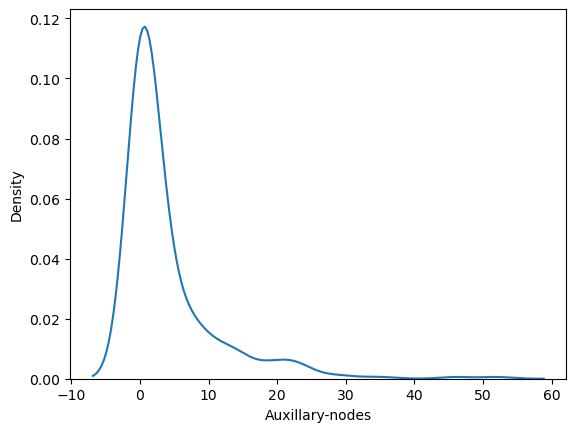

In [173]:
sns.kdeplot(data['Auxillary-nodes'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

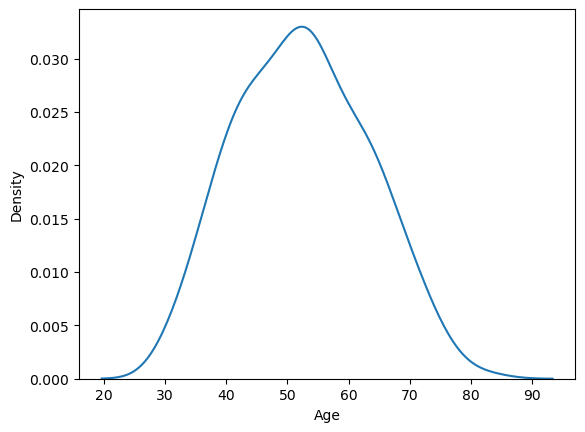

In [174]:
sns.kdeplot(data['Age'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survival_status', ylabel='Auxillary-nodes'>

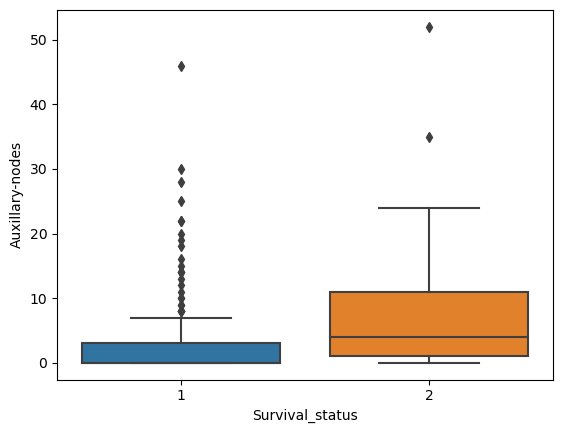

In [175]:
sns.boxplot(data['Survival_status'],data['Auxillary-nodes'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survival_status', ylabel='Age'>

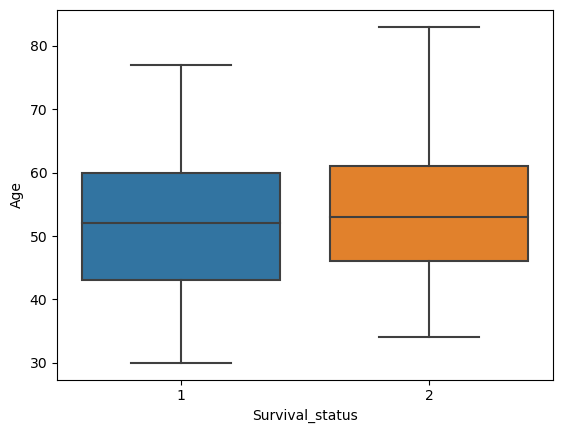

In [176]:
sns.boxplot(data['Survival_status'],data['Age'])

### Multivariate Analysis

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Auxillary-nodes', ylabel='Age'>

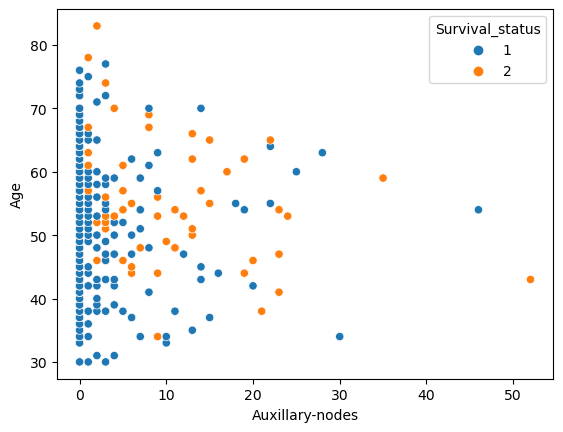

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.scatterplot(data['Auxillary-nodes'],data['Age'],hue=data['Survival_status'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Auxillary-nodes'>

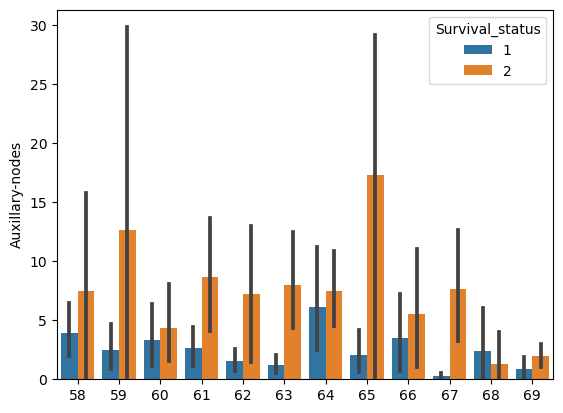

In [178]:
sns.barplot(sorted(data['Op-Year']),data['Auxillary-nodes'],hue=data['Survival_status'])

## Observations:
     * Age feature is almost normally distributed
     * Auxillary_node feature's distribution is skewed
     * Data has spread
     * Auxillay-node feature have outliers
     * Since its a classification problem the data is not linearly seperable
     * There is no relationship between the Survival status and year

## Train-Test Split

In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Survival_status']),
                                                    data['Survival_status'],
                                                    test_size=0.3,
                                                    stratify=data['Survival_status'])

X_train.shape, X_test.shape

((214, 3), (92, 3))

## Handling Imbalence Dataset

In [268]:
from collections import Counter
print("The number of classes before fit {}".format(Counter(y_train)))

The number of classes before fit Counter({'1': 157, '2': 57})


In [269]:
from imblearn.combine import SMOTETomek

os = SMOTETomek()
X_train, y_train = os.fit_resample(X_train, y_train)
print("The number of classes after fit {}".format(Counter(y_train)))

The number of classes after fit Counter({'2': 141, '1': 141})


## Handling Outliers

In [270]:
# Finding the Upper and lower limit
percentile25 = X_train['Auxillary-nodes'].quantile(0.25)
percentile75 = X_train['Auxillary-nodes'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

In [271]:
#Finding the outliers
import numpy as np
indices = np.where(X_train['Auxillary-nodes'] < upper_limit)[0]
X_train[X_train['Auxillary-nodes'] > upper_limit]

,Age,Op-Year,Auxillary-nodes
2,43,58.0,52
16,65,62.0,22
33,34,58.0,30
59,47,63.0,23
80,60,61.0,25
86,53,63.0,24
93,63,61.0,28
137,54,65.0,23
139,38,69.0,21
141,55,69.0,22


The above observations are actual obeservations but these points will be handled because these points are heavily deviated from mean so it will effect model

In [272]:
X_tain_clean=X_train.iloc[indices]
y_train_clean=y_train[indices]

## Feature Selection

In [273]:
X_train_new=X_tain_clean.drop(columns='Op-Year')
X_test_new=X_test.drop(columns='Op-Year')

#### Removed the year feature which is not relevant to this model

## Feature Scaling

In [274]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler,RobustScaler

scaler1 = StandardScaler()
scaler2 = RobustScaler()
X_train_scaled1 = scaler1.fit_transform(X_train_new)
X_test_scaled1 = scaler1.transform(X_test_new)
X_train_scaled2 = scaler2.fit_transform(X_train_new)
X_test_scaled2 = scaler2.transform(X_test_new)

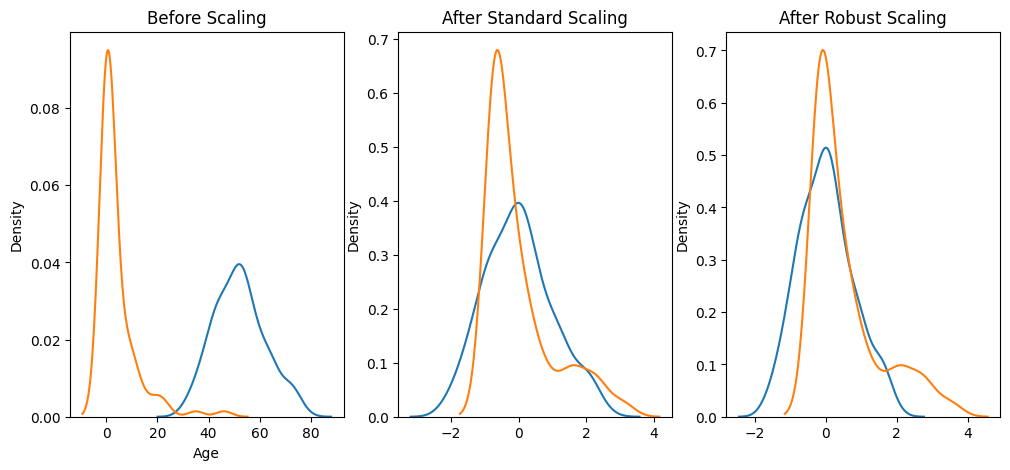

In [275]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_new['Age'], ax=ax1)
sns.kdeplot(X_test_new['Auxillary-nodes'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled1[:, 0], ax=ax2)  # Use X_train_scaled[:, 0] to access the 'Age' column
sns.kdeplot(X_train_scaled1[:, 1], ax=ax2)  # Use X_train_scaled[:, 1] to access the 'Auxillary-nodes' column

# after scaling
ax3.set_title('After Robust Scaling')
sns.kdeplot(X_train_scaled2[:, 0], ax=ax3)  # Use X_train_scaled[:, 0] to access the 'Age' column
sns.kdeplot(X_train_scaled2[:, 1], ax=ax3)  # Use X_train_scaled[:, 1] to access the 'Auxillary-nodes' column

plt.show()


Obsevation: Here both scaling techniques can be applied because there is no change in the distribution of features after scaling

## Feature Transformation

In [276]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [277]:
le.fit(y_train_clean)

LabelEncoder()

In [278]:
y_train = le.transform(y_train_clean)
y_test = le.transform(y_test)

## Creating a pipeline

In [279]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm

In [280]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [286]:
###Creating pipeline
# Scaling
trf1 = ColumnTransformer([
   ('scale',StandardScaler(),slice(0,2))
])

# train the model
trf2 = svm.SVC()

pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
])


#Grid Search for parameter tuning
params={
    'trf1__scale': (RobustScaler(), StandardScaler()),
    'trf2':(svm.SVC(), DecisionTreeClassifier(), RandomForestClassifier())
    }
grid= GridSearchCV(pipe, params,cv=5)
#Fitting Model
grid.fit(X_train_new, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(transformers=[('scale',
                                                                         StandardScaler(),
                                                                         slice(0, 2, None))])),
                                       ('trf2', SVC())]),
             param_grid={'trf1__scale': (RobustScaler(), StandardScaler()),
                         'trf2': (SVC(), DecisionTreeClassifier(),
                                  RandomForestClassifier())})

In [287]:
#Printing Best parameters
grid.best_params_

{'trf1__scale': RobustScaler(), 'trf2': SVC()}

In [288]:
#Printing Results
print('Accuracy Scores:',grid.cv_results_['mean_test_score'])

Accuracy Scores: [0.71764706 0.70196078 0.69019608 0.71372549 0.70588235 0.69803922]


In [289]:
# Get the best model from the GridSearchCV
best_model = grid.best_estimator_

# Fit the best model to your data
best_model.fit(X_train_new, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('scale', RobustScaler(),
                                                  slice(0, 2, None))])),
                ('trf2', SVC())])

In [290]:
# Predict
y_pred = best_model.predict(X_test_new)

In [291]:
from sklearn.metrics import precision_score
positive_class = 1
precision_score(y_test,y_pred, pos_label=positive_class)

0.47058823529411764

## Cross validation

In [292]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(best_model, X_train_new, y_train, cv=5, scoring='accuracy').mean()

0.7176470588235294

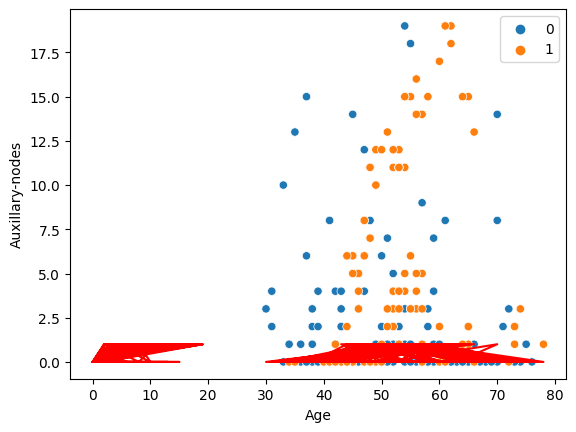

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train_new is your DataFrame, and y_train is your target variable
sns.scatterplot(x=X_train_new['Age'], y=X_train_new['Auxillary-nodes'], hue=y_train)
plt.plot(X_train_new,best_model.predict(X_train_new),color='r')
plt.show()

Hyper parameter tuning of SVC

In [328]:
# Define the parameter grid for further tuning
param_grid = {
    'trf1__scale': [RobustScaler(), StandardScaler()],
    'trf2__C': [0.5, 0.75, 1, 1.5],  # Example parameter values for SVM's C
    'trf2__kernel': ['linear','poly', 'rbf', 'sigmoid'],  # Example kernel options for SVM
    'trf2__degree' : [1, 2, 3, 4, 5, 6], # Degrees for polynomial kernel
    'trf2__probability' : [True]  # Add probability option for predict_proba

}

# Create a new grid search for the best model with extended parameter grid
final_grid = GridSearchCV(best_model, param_grid, cv=5, n_jobs = -1)

# Fit the final grid search to perform further parameter tuning
final_grid.fit(X_train_new, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(transformers=[('scale',
                                                                         RobustScaler(),
                                                                         slice(0, 2, None))])),
                                       ('trf2', SVC())]),
             n_jobs=-1,
             param_grid={'trf1__scale': [RobustScaler(), StandardScaler()],
                         'trf2__C': [0.5, 0.75, 1, 1.5],
                         'trf2__degree': [1, 2, 3, 4, 5, 6],
                         'trf2__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'trf2__probability': [True]})

In [329]:
final_grid.best_params_

{'trf1__scale': RobustScaler(),
 'trf2__C': 1,
 'trf2__degree': 1,
 'trf2__kernel': 'rbf',
 'trf2__probability': True}

In [330]:
#Printing Results
print('Maximum Accuracy Scores:',max(final_grid.cv_results_['mean_test_score']))

Maximum Accuracy Scores: 0.7176470588235294


Fitting the final model

In [331]:
# Get the best model from the GridSearchCV
final_model = final_grid.best_estimator_

# Fit the best model to your data
final_model.fit(X_train_new, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('scale', RobustScaler(),
                                                  slice(0, 2, None))])),
                ('trf2', SVC(C=1, degree=1, probability=True))])

Selecting the best threshold value

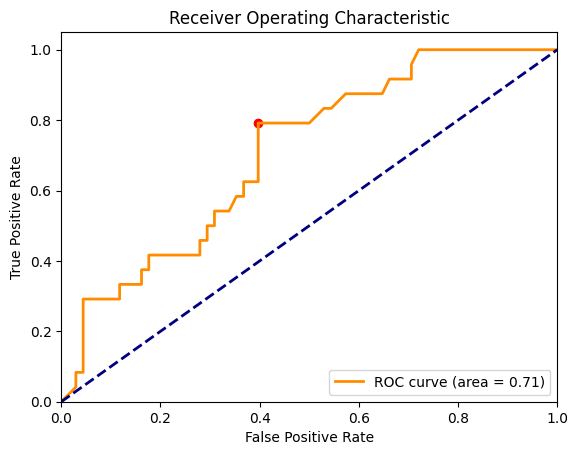

Optimal Threshold: 0.28339231105151613


In [337]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict using the final model
y_pred_prob = final_model.predict_proba(X_test_new)[:, 1] # Probabilities for the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Find the index of the threshold that maximizes the difference between TPR and FPR
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]

# Plot the selected threshold point on the ROC curve
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label='Selected Threshold')

plt.show()

print("Optimal Threshold:", optimal_threshold)

Extracting model and threshold value to pickle file

In [339]:
import joblib

# Save both model and threshold in a single dictionary
model_and_threshold = {
    'model': final_model,
    'threshold': optimal_threshold  # Example threshold value, replace with your actual threshold
}

# Save the dictionary to a pickle file
filename = 'model_and_threshold.pkl'
joblib.dump(model_and_threshold, filename)

['model_and_threshold.pkl']